Land and marine-terminating glaciers result in the generation of infrasound waves. Intuitively, we assume that terminating glaciers are a result of changes in climate factors. Therefore, there should be an explanatory relationship between our climate variables and the infrasound signals. Even though there may not be a direct causal relation between the climate variables and the signals, what we imply is that:

$$
P(\text{signal}(t) = a \mid \text{glacier}(t), \text{variables}(t)) = P(\text{signal}(t) = a \mid \text{glacier}(t))
$$

In this dataset, we don't have direct access to quantitative data that can characterize the exact state of terminating glaciers, so we cannot fully verify this. However, we can hypothesize a linear (or monotonic) relationship between glacier activity and the infrasound signals. Hence, we aim to classify whether there is a variation in glacier activity at time \( t \) by observing whether the infrasound signal is non-zero at that time.

The intuitive threshold is to distinguish between an infrasound signal being zero or non-zero. In the following sections, we will attempt to justify this assumption through statistical analysis of the data.


In [2]:
import pandas as pd 
import numpy as np

In [3]:
features = pd.read_csv('data_Features.csv')
target = pd.read_csv('data_Targets.csv')

In [4]:
features.shape, target.shape

((2556, 11), (2556, 5))

In [5]:
features['Y1']=target['Y1']

In [29]:
features.head()

,time,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,Y1
0,2013-01-01,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.0,0.0,0.0,0
1,2013-01-02,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.0,0.0,0.0,0
2,2013-01-03,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.0,0.0,0.0,0
3,2013-01-04,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.0,0.0,0.0,0
4,2013-01-05,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.0,0.0,0.0,0


In [30]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    2556 non-null   object 
 1   t2m     2556 non-null   float64
 2   u10     2556 non-null   float64
 3   v10     2556 non-null   float64
 4   SST     2556 non-null   float64
 5   SIC     2556 non-null   float64
 6   r1_MAR  2556 non-null   float64
 7   r2_MAR  2556 non-null   float64
 8   r3_MAR  2556 non-null   float64
 9   r4_MAR  2556 non-null   float64
 10  r5_MAR  2556 non-null   float64
 11  Y1      2556 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 239.8+ KB


In [32]:
features.describe()

,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,Y1
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000
mean,-10.190040,0.139648,0.626351,-0.858922,73.267808,18.789275,11.522362,1.328740,4.382248,5.191286,3.525430
std,10.340583,5.013640,3.955417,1.446165,29.250724,47.703600,27.942124,3.393452,12.971518,13.406972,18.977537
min,-32.019122,-13.846656,-12.316128,-1.692462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-19.877500,-3.610168,-2.079422,-1.689860,70.000000,0.123798,0.121437,0.000000,0.000000,0.000000,0.000000
50%,-9.596479,-0.187084,0.912780,-1.689860,84.601769,0.481870,0.481870,0.000000,0.000000,0.000000,0.000000
75%,0.167824,3.807440,3.483397,-0.297573,90.362319,4.080174,3.961181,0.004413,0.010148,0.000150,0.000000
max,7.840619,14.640913,12.811255,6.054536,99.500682,479.722174,281.673389,23.241791,115.876574,88.054318,433.000000


In [33]:
features['Y1'].value_counts()

Y1
0      2262
1        62
2        22
6        13
5        11
       ... 
38        1
26        1
47        1
84        1
100       1
Name: count, Length: 89, dtype: int64

Out of 2556 observations, 2262 (approximately 88%) of the Y values are zeros. This aligns with the statement from the article: *"The infrasonic detections mostly occur during the summer months, and the active period generally lasts from the end of June to the beginning of August, peaking in mid-July."*

From this, we can estimate that glacier activity typically spans 1 to 2 months during the summer, accounting for the remaining 12% of the year.


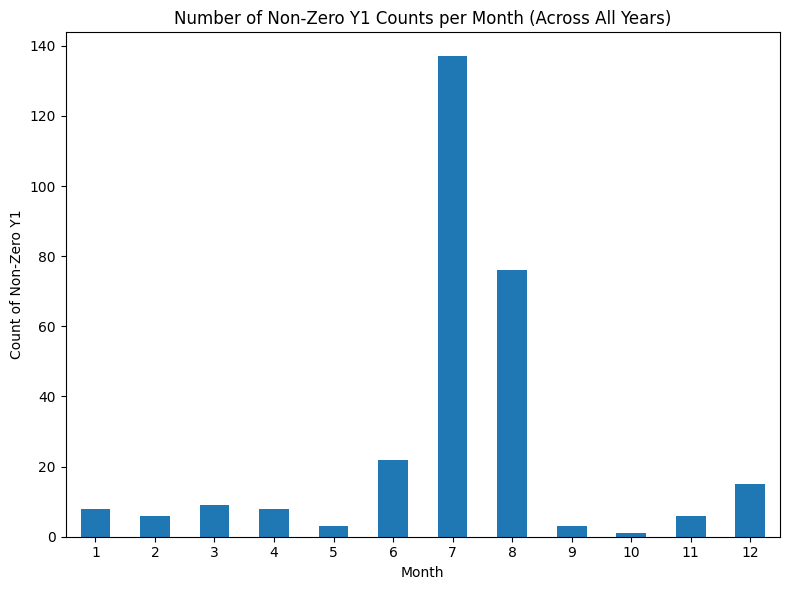

In [37]:
# we can verify this further by plotting the count of non zero Y1's accross the dataset

import pandas as pd
import matplotlib.pyplot as plt

features['time'] = pd.to_datetime(features['time'], format='%Y-%m-%d')

features['month'] = features['time'].dt.month

monthly_counts = features[features['Y1'] != 0].groupby('month')['Y1'].count()

plt.figure(figsize=(8,6))
monthly_counts.plot(kind='bar')
plt.title('Number of Non-Zero Y1 Counts per Month (Across All Years)')
plt.xlabel('Month')
plt.ylabel('Count of Non-Zero Y1')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


I hope we justified enough our threshhold for seperation, we will now create a new categorical features that takes either value yes (for presence of signal) or no (for absence of signal).

In [6]:
data=features.copy()
data['signal'] = data['Y1'].apply(lambda x: 'yes' if x > 0 else 'no')

# 1) Logistic Regression

The logistic regression model is:

$$
P(y = 1 \mid x) = \sigma(x^\top \beta) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_p x_p)}}
$$

where $ \sigma $ represents the sigmoid function, mapping the linear combination of inputs to a probability.

### Loss Function Used

many loss functions can be used in the case of classifications (and in particular binary classifications), for instance, a very intuitive and easy to understand loss function is the binary loss : 
$$
\text{Denoting } h : \mathbb{R}^2 \rightarrow \{-1, 1\}, \text{ the actual risk is given by } \mathbb{E}_{X,Y} [\delta_{h(X) \neq Y}]
$$

The 0-1 Loss is generally not ideal in machine learning for two main reasons:

1. **Non-Differentiability**: The 0-1 Loss assigns a loss of 1 if the prediction is incorrect and 0 if it’s correct, with no gradient information to guide the optimization process. This lack of differentiability makes it unsuitable for gradient-based optimization methods, like those used in neural networks, where we need a smooth, continuous function to compute gradients effectively.

2. **Insensitivity to Probability Errors**: The 0-1 Loss only cares about whether a prediction is correct or incorrect. It doesn’t take into account how incorrect the prediction is, so it doesn’t penalize cases where the model is confidently wrong (e.g., predicting 99% for the wrong class vs. 51%). Loss functions like cross-entropy or hinge loss address this by penalizing the model more heavily when it assigns high probabilities to incorrect predictions, encouraging it to be cautious with uncertain cases.

In contrast,  Maximum Likelihood Estimation (MLE) (or cross-entropy Loss) is the most popular choice as it tackles perfectly the above two problems . The likelihood function is:

$$
L(\beta) = \prod_{i=1}^n \left[ \sigma(x_i^\top \beta) \right]^{y_i} \left[ 1 - \sigma(x_i^\top \beta) \right]^{1 - y_i}
$$

The log-likelihood is maximized:

$$
\ell(\beta) = \sum_{i=1}^n \left[ y_i \log \sigma(x_i^\top \beta) + (1 - y_i) \log (1 - \sigma(x_i^\top \beta)) \right]
$$



In [7]:
import pandas as pd 
import numpy as np
features = pd.read_csv('data_Features.csv')
target = pd.read_csv('data_Targets.csv')
features['signal'] = (target['Y1'] != 0).astype(int)
X = features.drop(columns=['signal', 'time'])  
y = features['signal'] 

### Model Scoring Metrics

For model scoring, we will use the class below to evaluate the model. While accuracy is a straightforward metric, metrics like **log loss** and **AUC** are often more informative, particularly in imbalanced datasets or probabilistic models. Here’s why:

- **Log Loss**: Measures the certainty of probabilistic predictions. It penalizes predictions based on how close the predicted probabilities are to the true labels, so even if a model is “accurate” in terms of correct classifications, log loss will highlight when it’s overconfident or uncertain in its predictions. This makes it especially valuable in scenarios where the confidence level of predictions matters.

- **AUC (Area Under the ROC Curve)**: Reflects the model's ability to distinguish between classes, regardless of threshold. AUC is insensitive to class imbalance and provides a more robust assessment of performance compared to accuracy. It helps assess how well the model separates classes over all possible thresholds.

- **Accuracy**: While simple to understand, accuracy can be misleading in imbalanced datasets, as it may mask poor performance in the minority class. For example, in a dataset where 90% of instances belong to one class, a model that predicts only the majority class would achieve 90% accuracy without being useful.


### Real Risk vs. Empirical Risk

An essential concept is the distinction between **real risk** (which we can't measure) and **empirical risk** (i.e., loss). Since we operate in a parameterized space (e.g., the space of logistic functions), the empirical risk will generally exceed the real risk due to the introduction of bias. However, when properly calibrated, empirical risk serves as a reasonable approximation of real risk.

Empirical risk is a random variable influenced by the subsamples we select for evaluation. To reduce the variance of this random variable and obtain a more stable estimate, we use **cross-validation**.


In [8]:
from sklearn.model_selection import cross_validate

class ScoreBoard:
    '''
    Scoreboard that evaluates different methods for a given experiment and collect
    evaluation scores into a Pandas dataframe.
    '''
    def __init__(self, scoring_functions={'acc' : 'accuracy', 'auc': 'roc_auc', 'logL': 'neg_log_loss'}, n_folds=10):
        '''
        Constructor
        
        - scoring_functions: dict of scoring functions (name mapped to a scoring function or scikit score name)
        - n_folds: default number of folds for cross-validation
        '''
        self.scoring_functions = scoring_functions
        self.score_names = list(scoring_functions.keys())
        self.scores = None
        self.n_folds = n_folds
        
    def _repr_html_(self):
        '''
        Convert object to an HTML representation (called by Jupyter notebook)
        '''
        if self.scores is not None:
            return self.scores._repr_html_()
        else:
            return "No scores available"
    
    def test(self, name, clf, X, Y, n_folds=None):
        '''
        Cross-validate a classifier
        '''
        if n_folds is None:
            n_folds = self.n_folds
        res  = cross_validate(clf, X, Y, cv=self.n_folds, scoring=self.scoring_functions, error_score='raise')

        entry = { score_name: np.mean(res[f'test_{score_name}']) for score_name in self.score_names }
        entry['classifier'] = name
        self.scores = pd.concat([self.scores, pd.DataFrame([entry], columns= [ 'classifier' ] + self.score_names)], ignore_index=True)


In [9]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
scoreboard = ScoreBoard()

scoreboard.test(name="Logistic Regression", clf=clf, X=X, Y=y)

print(scoreboard.scores)

            classifier       acc       auc      logL
0  Logistic Regression  0.941697  0.832172 -0.208888


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

class ScoreBoard:
    '''
    Scoreboard that evaluates different methods for a given experiment and collects
    evaluation scores into a Pandas dataframe.
    '''
    def __init__(self, scoring_functions={'acc': 'accuracy', 'auc': 'roc_auc', 'logL': 'neg_log_loss'}, n_folds=10):
        self.scoring_functions = scoring_functions
        self.score_names = list(scoring_functions.keys())
        self.scores = None
        self.n_folds = n_folds
        
    def _repr_html_(self):
        if self.scores is not None:
            return self.scores._repr_html_()
        else:
            return "No scores available"
    
    def test(self, name, clf, X, Y, n_folds=None):
        if n_folds is None:
            n_folds = self.n_folds
        res = cross_validate(clf, X, Y, cv=self.n_folds, scoring=self.scoring_functions, error_score='raise')
        
        entry = {score_name: np.mean(res[f'test_{score_name}']) for score_name in self.score_names}
        entry['classifier'] = name
        self.scores = pd.concat([self.scores, pd.DataFrame([entry], columns=['classifier'] + self.score_names)], ignore_index=True)

    def test_with_confusion_matrix(self, name, clf, X, Y):
        labels = np.unique(Y)
        predictions = cross_val_predict(clf, X, Y, cv=self.n_folds)
        conf_matrix = confusion_matrix(Y, predictions, labels=labels)
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title(f'Confusion Matrix (Averaged across {self.n_folds} folds) for {name}')
        plt.show()
        
        report = classification_report(Y, predictions, labels=labels, output_dict=True)
        precision_recall = {label: {'precision': report[str(label)]['precision'], 
                                    'recall': report[str(label)]['recall']}
                            for label in labels}
        
        print("Precision and Recall for each class:")
        for label, metrics in precision_recall.items():
            print(f"Class {label}: Precision = {metrics['precision']:.3f}, Recall = {metrics['recall']:.3f}")
    def test_with_custom_threshold(self, name, clf, X, Y, threshold=0.5):
        labels = np.unique(Y)
        
        clf.fit(X, Y)
        probabilities = clf.predict_proba(X)[:, 1]

        predictions = (probabilities >= threshold).astype(int)

        accuracy = accuracy_score(Y, predictions)
        print(f"Overall Accuracy with threshold {threshold}: {accuracy:.3f}")

        conf_matrix = confusion_matrix(Y, predictions, labels=labels)
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title(f'Confusion Matrix (Threshold = {threshold}) for {name}')
        plt.show()
        
        report = classification_report(Y, predictions, labels=labels, output_dict=True)
        precision_recall = {label: {'precision': report[str(label)]['precision'], 
                                    'recall': report[str(label)]['recall']}
                            for label in labels}
        
        print(f"Precision and Recall for each class with threshold {threshold}:")
        for label, metrics in precision_recall.items():
            print(f"Class {label}: Precision = {metrics['precision']:.3f}, Recall = {metrics['recall']:.3f}")



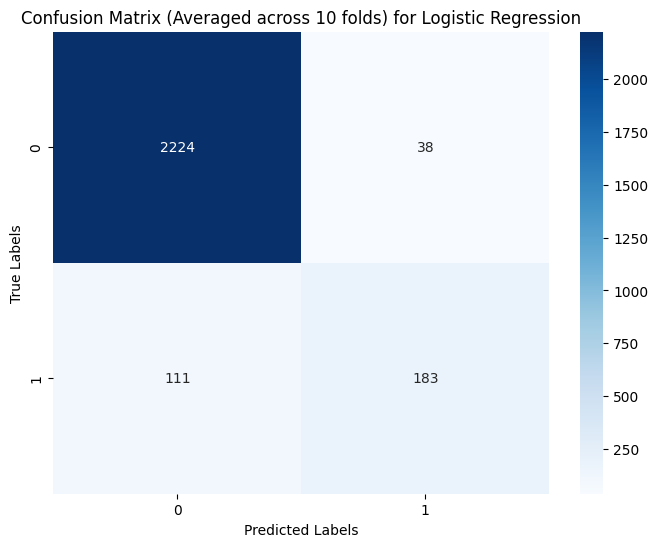

Precision and Recall for each class:
Class 0: Precision = 0.952, Recall = 0.983
Class 1: Precision = 0.828, Recall = 0.622
            classifier       acc       auc      logL
0  Logistic Regression  0.941697  0.832172 -0.208888


In [11]:
# Example usage
clf = LogisticRegression(max_iter=1000)
scoreboard = ScoreBoard()

scoreboard.test(name="Logistic Regression", clf=clf, X=X, Y=y)
scoreboard.test_with_confusion_matrix(name="Logistic Regression", clf=clf, X=X, Y=y)

print(scoreboard.scores)

### Model Accuracy and Precision for Class 1

Our current model achieves an overall accuracy of **0.94**, outperforming a naive predictor. However, the recall for **Class 1** (representing the "presence of signal") is **62.2%**, indicating that the model struggles to detect Class 1 instances accurately.

If the model's objective is to function in a real-world scenario as an **alarm system** for detecting glacier activity, these results may not suffice. The low false alarm rate is favorable (high precision), but the model would miss many true positive cases of glacier activity, limiting its usefulness for an alarm application.

Next, we will focus on **improving Class 1 precision**, accepting a potential trade-off in Class 0 precision to enhance the model's ability to detect positive instances more effectively. This adjustment should bring the model closer to fulfilling its intended purpose as an effective detection tool.


As mentioned earlier, the data is imbalanced, leading the model to a tendency for overfitting. To address this, we can consider the following techniques:

1) **Resampling Techniques**:
   - **Oversampling**: Increase the instances of the minority class using methods like SMOTE or random oversampling.
   - **Undersampling**: Reduce instances of the majority class to match the minority class count.

   However, with a relatively small dataset (only 2500 data points, of which only 300 belong to Class 1), oversampling may lead to overfitting, while undersampling could cause a loss of valuable information, so we won't opt for this.

2) **Threshold Adjustment**: This post-training approach involves adjusting the decision threshold based on precision-recall trade-offs to improve model performance on the minority class.

3) **Class Weight Adjustment**: During training, we can set `class_weight='balanced'` in scikit-learn’s logistic regression. This will assign higher weights to the minority class, making the model more sensitive to these instances.



Testing with threshold 0.5:
Overall Accuracy with threshold 0.5: 0.945


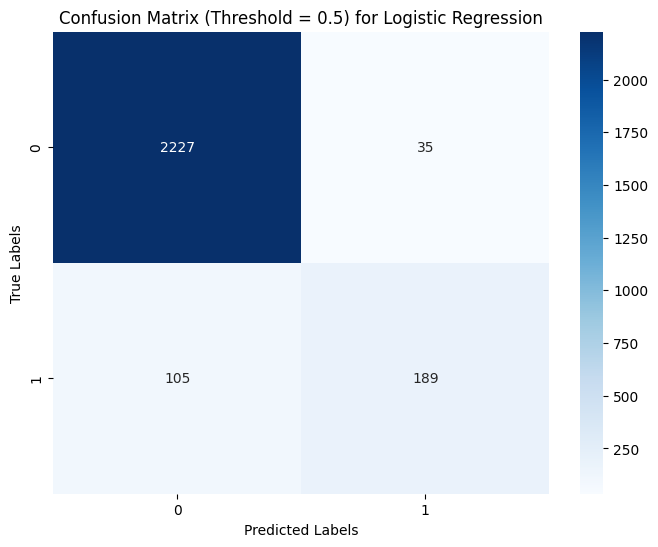

Precision and Recall for each class with threshold 0.5:
Class 0: Precision = 0.955, Recall = 0.985
Class 1: Precision = 0.844, Recall = 0.643

Testing with threshold 0.4:
Overall Accuracy with threshold 0.4: 0.945


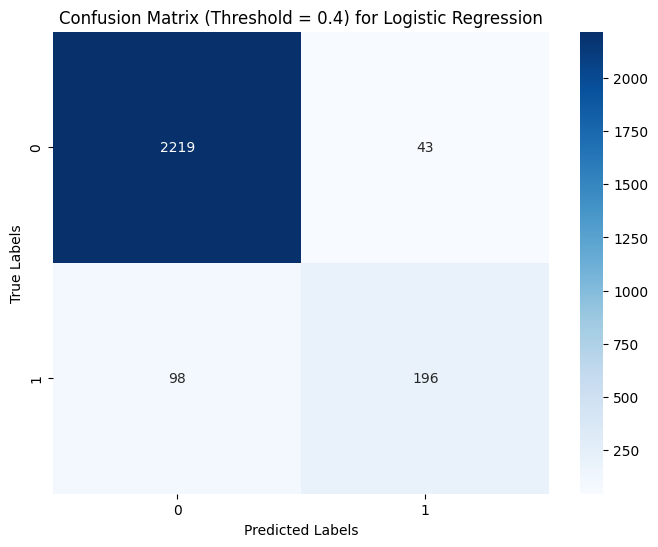

Precision and Recall for each class with threshold 0.4:
Class 0: Precision = 0.958, Recall = 0.981
Class 1: Precision = 0.820, Recall = 0.667

Testing with threshold 0.3:
Overall Accuracy with threshold 0.3: 0.944


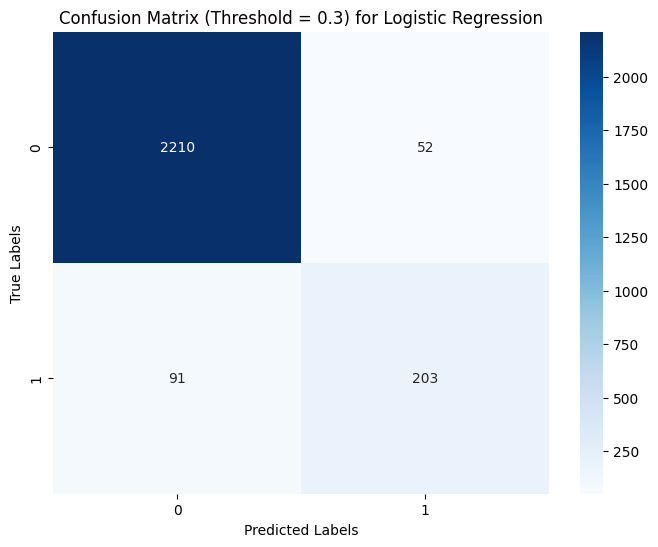

Precision and Recall for each class with threshold 0.3:
Class 0: Precision = 0.960, Recall = 0.977
Class 1: Precision = 0.796, Recall = 0.690

Testing with threshold 0.2:
Overall Accuracy with threshold 0.2: 0.941


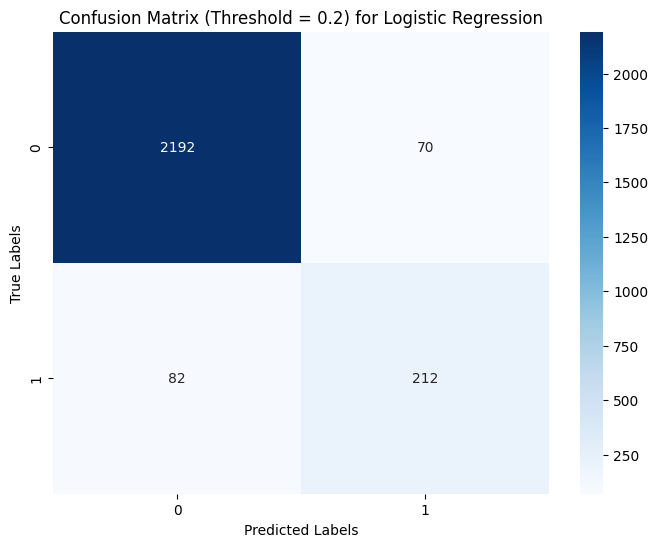

Precision and Recall for each class with threshold 0.2:
Class 0: Precision = 0.964, Recall = 0.969
Class 1: Precision = 0.752, Recall = 0.721

Testing with threshold 0.1:
Overall Accuracy with threshold 0.1: 0.933


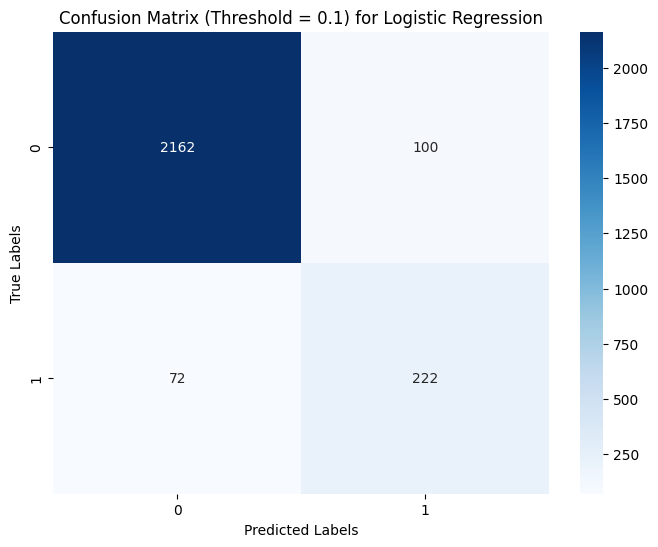

Precision and Recall for each class with threshold 0.1:
Class 0: Precision = 0.968, Recall = 0.956
Class 1: Precision = 0.689, Recall = 0.755


In [17]:
# Testing with various thresholds
clf = LogisticRegression(max_iter=1000)
scoreboard = ScoreBoard()

for threshold in [0.5, 0.4, 0.3, 0.2 , 0.1]:
    print(f"\nTesting with threshold {threshold}:")
    scoreboard.test_with_custom_threshold(name="Logistic Regression", clf=clf, X=X, Y=y, threshold=threshold)


As we can see, there is a trade-off between **recall** and **precision**. Deciding "how much we are willing to accept false signals" in exchange for detecting more true glacier events is dependent on the specific use case.


Now let's try class weight adjsutment:

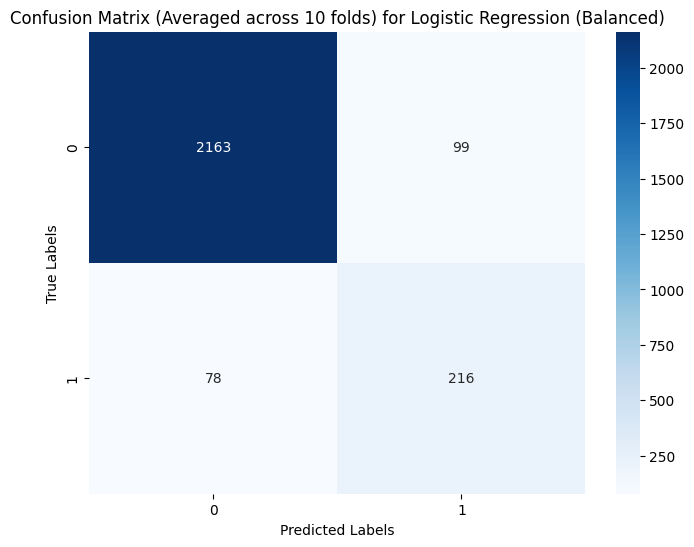

Precision and Recall for each class:
Class 0: Precision = 0.965, Recall = 0.956
Class 1: Precision = 0.686, Recall = 0.735
                       classifier       acc       auc      logL
0  Logistic Regression (Balanced)  0.930726  0.846647 -0.369024


In [18]:
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
scoreboard = ScoreBoard()

scoreboard.test(name="Logistic Regression (Balanced)", clf=clf, X=X, Y=y)
scoreboard.test_with_confusion_matrix(name="Logistic Regression (Balanced)", clf=clf, X=X, Y=y)

print(scoreboard.scores)

Manually adjusting the probability threshold (setting it to 0.1) yielded a slight improvement in both recall and precision.


# 2) Ensemble Methods : 

Logistic regression offers excellent interpretability; for example, we can infer the impact of a feature on the predicted outcome directly from its associated coefficient, βᵢ. However, this model imposes a strict initial hypothesis, assuming the logit of probability is a linear function of the inputs. While it’s possible to capture non-linearity using basis functions, selecting the right functions and avoiding overfitting is challenging.

Ensemble methods, in contrast, don’t rely on an explicit hypothesis function. Instead, they divide the feature space into subspaces, each assigned a label. This approach is highly effective for both regression and classification on tabular data and is considered state-of-the-art for these problems.

## i) Random Forests : 

Random forests are an ensemble learning method widely used for classification tasks due to their robustness and versatility. This technique leverages multiple decision trees to produce more accurate and stable predictions by aggregating the results from individual models. Below, we provide an overview of decision trees, explain the random forest framework, and discuss key hyperparameters that influence performance.

### Decision Trees
A decision tree is a tree-structured model used to iteratively split data based on feature values to maximize the purity of each subset. At each node of the tree, a split is determined based on a chosen criterion, either the *Gini Index* or *Entropy Gain*:

- **Gini Index**: Measures the impurity of a node by calculating the probability of misclassification. For a binary classification problem with classes \( p \) and \( q \), the Gini index at node \( i \) is given by:
  
  $$
  Gini(i) = 1 - \sum_{j=1}^{2} p_j^2.
  $$

- **Entropy Gain**: Quantifies the disorder within a node, with higher entropy indicating more impurity. The entropy at node \( i \) is defined as:

  $$
  Entropy(i) = - \sum_{j=1}^{2} p_j \log(p_j),
  $$

  where \( p_j \) represents the proportion of samples in class \( j \).

Splitting is performed by selecting the feature and threshold that maximize purity, minimizing the Gini index or entropy in the resulting subsets.

### Bootstrapping and Variance Reduction
Random forests improve upon individual decision trees by applying the principle of *bootstrapping* to build multiple trees. For each tree, a random sample with replacement is drawn from the training dataset, creating a unique subset. This approach, known as *bagging*, introduces diversity among the trees, enabling the forest to capture more patterns and reduce overfitting. By aggregating predictions across all trees, random forests reduce *variance* compared to a single tree, enhancing generalization.

### Hyperparameters of Random Forests
Several hyperparameters control the structure and performance of a random forest, impacting the bias-variance trade-off, which is crucial for optimizing model performance:

- **Number of Trees (n\_estimators)**: The number of decision trees in the forest. A higher number of trees reduces variance but may increase computational cost, typically improving accuracy up to a point of diminishing returns.

- **Maximum Depth (max\_depth)**: The maximum depth of each tree. Limiting the depth helps prevent overfitting (high variance) by encouraging simpler models, though setting it too low may introduce underfitting (high bias).

- **Minimum Samples per Leaf (min\_samples\_leaf)**: The minimum number of samples required in each leaf node. Higher values lead to smoother, more generalized trees, reducing variance but potentially increasing bias.

- **Maximum Features (max\_features)**: The maximum number of features to consider for each split. This parameter introduces randomness, reducing correlation among trees and thereby decreasing variance. Lower values reduce variance but may slightly increase bias.

Careful tuning of these hyperparameters allows random forests to achieve a balance of bias and variance, making them a powerful choice for complex binary classification tasks.


Tuning hyperparameters is generally done via cross-validation, where we select a set of parameters, train the model on a training set, and then evaluate it on a separate validation set untouched during training. This approach provides an unbiased estimate of the true risk.

The most effective cross-validation method is **k-fold cross-validation**, where we split the data into *k* subsets and train *k* models, each time leaving out one subset as the validation set. Since the estimated risk from cross-validation is a random variable with an expected value equal to the real risk, this process reduces the variance of our risk estimate, bringing it closer to the true risk.


Let's jump into coding:

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

recall_class1_scorer = make_scorer(recall_score, pos_label=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [ 3, 6],
    'min_samples_leaf': [3, 5, 7],
    'max_features': [0.8,0.9, None]
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  
    scoring=recall_class1_scorer,  # Using recall on class 1 as the scoring metric 
    n_jobs=-1  
)

grid_search.fit(X, y)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print("Best Parameters from Grid Search:")
print(best_params)




Best Parameters from Grid Search:
{'max_depth': 3, 'max_features': None, 'min_samples_leaf': 7, 'n_estimators': 50}


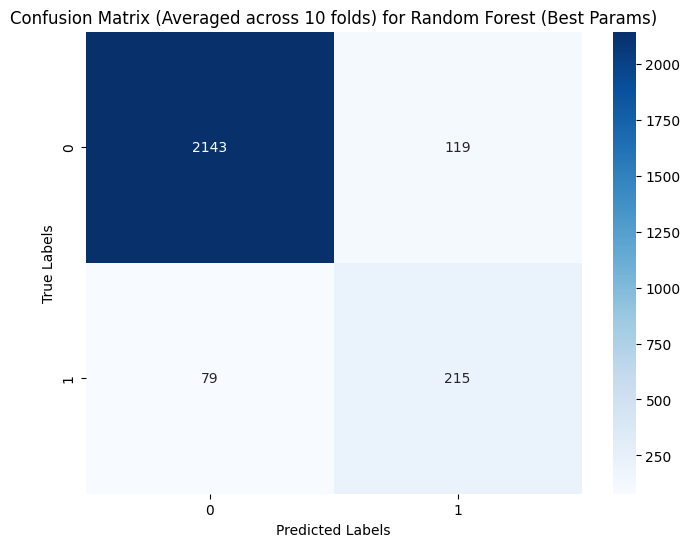

Precision and Recall for each class:
Class 0: Precision = 0.964, Recall = 0.947
Class 1: Precision = 0.644, Recall = 0.731
                    classifier       acc       auc    logL
0  Random Forest (Best Params)  0.922512  0.852734 -0.3392


In [32]:
scoreboard = ScoreBoard()

scoreboard.test(name="Random Forest (Best Params)", clf=best_rf, X=X, Y=y)
scoreboard.test_with_confusion_matrix(name="Random Forest (Best Params)", clf=best_rf, X=X, Y=y)

print(scoreboard.scores)

## ii) Xgboost (as a boosting algorithm):

XGBoost, short for *Extreme Gradient Boosting*, is a highly efficient and scalable machine learning algorithm based on the principle of boosting. XGBoost is designed to improve predictive accuracy by sequentially building a series of decision trees, each of which corrects the errors made by its predecessors. The algorithm has gained widespread popularity for its performance in structured data tasks, particularly binary classification.

### The Principle of Boosting
Boosting is an ensemble technique where models are added sequentially, with each new model focusing on correcting the mistakes of the previous ones. Unlike bagging, where each model is built independently (as in random forests), boosting builds models in sequence. XGBoost applies this principle by adding one weak learner (typically a decision tree) at a time, each weighted by its contribution to reducing errors. This approach effectively reduces bias and creates a more accurate and robust model.

### Error Correction and the Concept of Gradient Descent
In XGBoost, the contribution of each tree is determined by minimizing a loss function, commonly logistic loss for classification. The process is as follows:

- Each new tree \( T_m \) is trained to fit the residual errors, or "pseudo-residuals," left by the previous trees in the sequence. These pseudo-residuals are calculated as the negative gradients of the loss function with respect to the model's predictions.
- After each tree is trained, its contribution (or "say") to the final prediction is scaled by a learning rate parameter, which controls the impact of each tree to avoid overfitting.
- The cumulative prediction is then updated by adding the weighted prediction of the new tree to correct previous errors. This iterative process continues until a pre-defined number of trees is reached.

This gradient-based correction, combined with regularization techniques, enables XGBoost to manage both bias and variance effectively.

### Hyperparameters of XGBoost
XGBoost offers several hyperparameters that can be adjusted to balance bias and variance, improving the model's generalization ability:

- **Number of Trees (n\_estimators)**: Specifies the number of boosting rounds. More trees can reduce bias but may increase variance if overfitting occurs. Higher values are often paired with a lower learning rate for optimal performance.
    
- **Learning Rate (eta)**: Controls each tree’s contribution to the final prediction. Lower values result in smaller updates, preventing overfitting but may require more trees to reach an optimal solution, reducing bias with minimal impact on variance.
    
- **Maximum Depth (max\_depth)**: Limits the depth of each tree. Deeper trees capture more complex patterns but can increase variance. Shallower trees improve generalization by reducing variance at the cost of higher bias.
    
- **Minimum Child Weight (min\_child\_weight)**: Sets the minimum sum of instance weights in a child node. Higher values prevent overly specific splits on minor patterns, reducing variance and controlling overfitting.
    
- **Gamma**: A regularization parameter that controls node splitting. Higher gamma values make the algorithm more conservative, requiring a larger reduction in loss to allow a split, which helps reduce variance.


**Remark**: XGBoost does not offer a direct `class_weight='balanced'` option like `RandomForestClassifier` or `LogisticRegression`. However, it can handle class imbalance through *Scale_Pos_Weight*, This parameter adjusts the weight of the positive class relative to the negative class, effectively balancing the classes and providing functionality similar to `class_weight='balanced'`.


In [29]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

recall_class1_scorer = make_scorer(recall_score, pos_label=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [3, 5, 7],
    'gamma': [0, 0.1, 0.3],
    'scale_pos_weight': [4]  
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5, 
    scoring=recall_class1_scorer,  # Using recall on class 1 as the scoring metric
    n_jobs=-1  
)
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_xgb = grid_search.best_estimator_

print("Best Parameters from Grid Search (based on recall for class 1):")
print(best_params)



Best Parameters from Grid Search (based on recall for class 1):
{'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 7, 'n_estimators': 50, 'scale_pos_weight': 4}


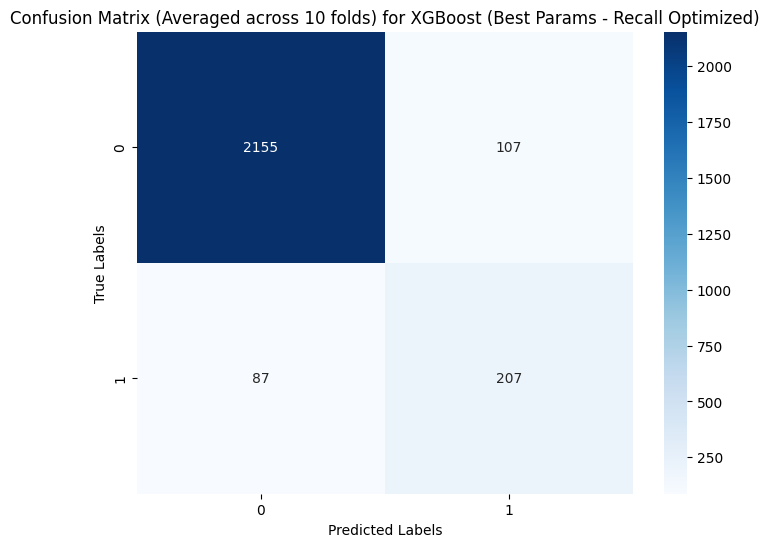

Precision and Recall for each class:
Class 0: Precision = 0.961, Recall = 0.953
Class 1: Precision = 0.659, Recall = 0.704
                                 classifier       acc       auc      logL
0  XGBoost (Best Params - Recall Optimized)  0.924078  0.821939 -0.289317


In [ ]:
scoreboard = ScoreBoard()

scoreboard.test(name="XGBoost (Best Params - Recall Optimized)", clf=best_xgb, X=X, Y=y)
scoreboard.test_with_confusion_matrix(name="XGBoost (Best Params - Recall Optimized)", clf=best_xgb, X=X, Y=y)

print(scoreboard.scores)

# 3) Comparison and conclusion :

Although ensemble methods typically outperform logistic regression in complex tasks, in our case, logistic regression with some adjustments yielded better results, particularly in terms of the precision-recall trade-off and overall accuracy for Class 1. For instance, logistic regression with a 0.2 probability threshold achieved **Precision = 0.752** and **Recall = 0.721**. In comparison, the best parameters for random forest produced **Class 1 Precision = 0.644** and **Recall = 0.731**, while XGBoost gave **Class 1 Precision = 0.659** and **Recall = 0.704**.

While additional tuning of hyperparameters, such as `scale_pos_weight` for XGBoost, might improve these results, if the problem is indeed linearly separable based on the input parameters, logistic regression is expected to perform better, as it suits simpler, linear relationships without complex boundaries in the data.
